In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import nltk
from collections import Counter
from itertools import chain
import datetime as dt

In [2]:
from ipynb.fs.full.functions import freq_bigram  

Cargamos el archivo pickle limpio y lo convertimos a un DataFrame

In [131]:
df = pd.read_pickle('repo_nacho.pkl')

Dejamos el archivo iniciando con las tesis del año 2002, y descartamos los años anteriores

In [132]:
df = df.sort_values(by=['Fecha'])

In [133]:
df = df.iloc[-1083:]

In [134]:
df

,Fecha,Título,Título cleaned,bigrams
652,2002,Inclusión partidista y exclusión cultural en C...,"[inclusión, partidista, exclusión, cultural, p...","[(inclusión, partidista), (partidista, exclusi..."
186,2002,Los cinco viajes de los feminismos en Colombia...,"[cinco, viajes, feminismos, 19801999, avances,...","[(cinco, viajes), (viajes, feminismos), (femin..."
605,2002,Hojas de Warmi (no. 13),"[hojas, warmi, 13]","[(hojas, warmi), (warmi, 13)]"
1174,2002,"Rojo difuso, azul pálido. Los partidos tradici...","[rojo, difuso, azul, pálido, partidos, tradici...","[(rojo, difuso), (difuso, azul), (azul, pálido..."
157,2002,Camino hacia nuevas ciudadanías,"[camino, nuevas, ciudadanías]","[(camino, nuevas), (nuevas, ciudadanías)]"
...,...,...,...,...
188,2019,Ciudadanía bogotana y violencia en Colombia. R...,"[ciudadanía, bogotana, violencia, respuestas, ...","[(ciudadanía, bogotana), (bogotana, violencia)..."
208,2019,Colombia Soviética. El concepto de nación en e...,"[soviética, nación, partido, comunista, 19301938]","[(soviética, nación), (nación, partido), (part..."
1252,2019,"Terrorismo y guerra, la ruta equivocada","[terrorismo, guerra, ruta, equivocada]","[(terrorismo, guerra), (guerra, ruta), (ruta, ..."
1266,2019,Trayectorias de las transiciones políticas con...,"[trayectorias, transiciones, políticas, confli...","[(trayectorias, transiciones), (transiciones, ..."


Calculamos las tesis por año y graficamos

In [135]:
txa = df.groupby(['Fecha']).size()

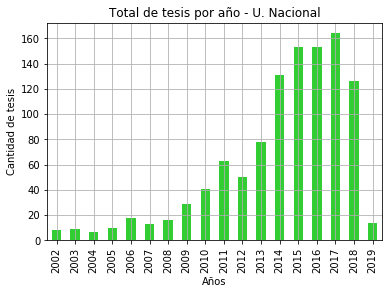

<Figure size 432x288 with 0 Axes>

In [136]:
txa.plot(kind='bar', stacked=True, color = 'limegreen')
plt.grid()
plt.xlabel('Años')
plt.ylabel('Cantidad de tesis')
plt.title('Total de tesis por año - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('txa_nacho.png')

Calculamos la frecuencia de los Bigramas

In [139]:
bigrams = df['bigrams'].tolist()
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower()) for x,y in bigrams]
bigram_counts = list(Counter(bigrams).most_common(15))
bigram_counts = tuple(bigram_counts)

Graficamos

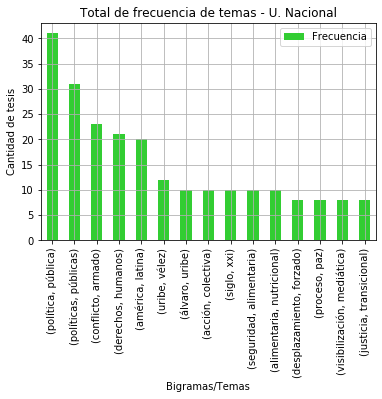

<Figure size 432x288 with 0 Axes>

In [140]:
df_bigrams = pd.DataFrame(bigram_counts, columns=['Bigrama', 'Frecuencia'])
df_bigrams.plot(kind='bar', x = 'Bigrama', stacked=True, color='limegreen')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('Freq_bigramas_nacho.png')

Calculamos frecuencia general de palabras y graficamos

In [141]:
text_plano = sum(df['Título cleaned'], [])
freq_w= nltk.FreqDist(text_plano)
freq_w = freq_w.most_common(50)
freq_w = tuple(freq_w)

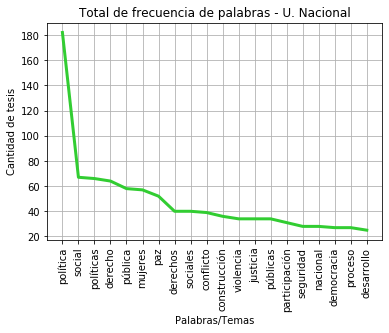

<Figure size 432x288 with 0 Axes>

In [142]:
plt.plot(*zip(*freq_w[:20]), color = 'limegreen', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de palabras - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.show()
plt.savefig('top20_w_nacho.png')

Creamos los df por año, para buscar las palabras más comúnes

In [143]:
df_2002 = df[df["Fecha"] == 2002]
df_2003 = df[df["Fecha"] == 2003]
df_2004 = df[df["Fecha"] == 2004]
df_2005 = df[df["Fecha"] == 2005]
df_2006 = df[df["Fecha"] == 2006]
df_2007 = df[df["Fecha"] == 2007]
df_2008 = df[df["Fecha"] == 2008]
df_2009 = df[df["Fecha"] == 2009]
df_2010 = df[df["Fecha"] == 2010]
df_2011 = df[df["Fecha"] == 2011]
df_2012 = df[df["Fecha"] == 2012]
df_2013 = df[df["Fecha"] == 2013]
df_2014 = df[df["Fecha"] == 2014]
df_2015 = df[df["Fecha"] == 2015]
df_2016 = df[df["Fecha"] == 2016]
df_2017 = df[df["Fecha"] == 2017]
df_2018 = df[df["Fecha"] == 2018]
df_2019 = df[df["Fecha"] == 2019]

Calculamos frecuencia de palabras por año

In [144]:
text_2002 = sum(df_2002['Título cleaned'], [])
freq_w_2002 = nltk.FreqDist(text_2002)
freq_w_2002 = freq_w_2002.most_common(20)
freq_w_2002 = tuple(freq_w_2002)

text_2003 = sum(df_2003['Título cleaned'], [])
freq_w_2003 = nltk.FreqDist(text_2003)
freq_w_2003 = freq_w_2003.most_common(20)
freq_w_2003 = tuple(freq_w_2003)

text_2004 = sum(df_2004['Título cleaned'], [])
freq_w_2004 = nltk.FreqDist(text_2004)
freq_w_2004 = freq_w_2004.most_common(20)
freq_w_2004 = tuple(freq_w_2004)

text_2005 = sum(df_2005['Título cleaned'], [])
freq_w_2005 = nltk.FreqDist(text_2005)
freq_w_2005 = freq_w_2005.most_common(20)
freq_w_2005 = tuple(freq_w_2005)

text_2006 = sum(df_2006['Título cleaned'], [])
freq_w_2006 = nltk.FreqDist(text_2006)
freq_w_2006 = freq_w_2006.most_common(20)
freq_w_2006 = tuple(freq_w_2006)

text_2007 = sum(df_2007['Título cleaned'], [])
freq_w_2007 = nltk.FreqDist(text_2007)
freq_w_2007 = freq_w_2007.most_common(20)
freq_w_2007 = tuple(freq_w_2007)

text_2008 = sum(df_2008['Título cleaned'], [])
freq_w_2008 = nltk.FreqDist(text_2008)
freq_w_2008 = freq_w_2008.most_common(20)
freq_w_2008 = tuple(freq_w_2008)

text_2009 = sum(df_2009['Título cleaned'], [])
freq_w_2009 = nltk.FreqDist(text_2009)
freq_w_2009 = freq_w_2009.most_common(20)
freq_w_2009 = tuple(freq_w_2009)

text_2010 = sum(df_2010['Título cleaned'], [])
freq_w_2010 = nltk.FreqDist(text_2010)
freq_w_2010 = freq_w_2010.most_common(20)
freq_w_2010 = tuple(freq_w_2010)

text_2011 = sum(df_2011['Título cleaned'], [])
freq_w_2011 = nltk.FreqDist(text_2011)
freq_w_2011 = freq_w_2011.most_common(20)
freq_w_2011 = tuple(freq_w_2011)

text_2012 = sum(df_2012['Título cleaned'], [])
freq_w_2012 = nltk.FreqDist(text_2012)
freq_w_2012 = freq_w_2012.most_common(20)
freq_w_2012 = tuple(freq_w_2012)

text_2013 = sum(df_2013['Título cleaned'], [])
freq_w_2013 = nltk.FreqDist(text_2013)
freq_w_2013 = freq_w_2013.most_common(20)
freq_w_2013 = tuple(freq_w_2013)

text_2014 = sum(df_2014['Título cleaned'], [])
freq_w_2014 = nltk.FreqDist(text_2014)
freq_w_2014 = freq_w_2014.most_common(20)
freq_w_2014 = tuple(freq_w_2014)

text_2015 = sum(df_2015['Título cleaned'], [])
freq_w_2015 = nltk.FreqDist(text_2015)
freq_w_2015 = freq_w_2015.most_common(20)
freq_w_2015 = tuple(freq_w_2015)

text_2016 = sum(df_2016['Título cleaned'], [])
freq_w_2016 = nltk.FreqDist(text_2016)
freq_w_2016 = freq_w_2016.most_common(20)
freq_w_2016 = tuple(freq_w_2016)

text_2017 = sum(df_2017['Título cleaned'], [])
freq_w_2017 = nltk.FreqDist(text_2017)
freq_w_2017 = freq_w_2017.most_common(20)
freq_w_2017 = tuple(freq_w_2017)

text_2018 = sum(df_2018['Título cleaned'], [])
freq_w_2018 = nltk.FreqDist(text_2018)
freq_w_2018 = freq_w_2018.most_common(20)
freq_w_2018 = tuple(freq_w_2018)

text_2019 = sum(df_2019['Título cleaned'], [])
freq_w_2019 = nltk.FreqDist(text_2019)
freq_w_2019 = freq_w_2019.most_common(20)
freq_w_2019 = tuple(freq_w_2019)

Graficamos frecuencia de palabras por año, para aquellos años que tienen más de 30 tesis

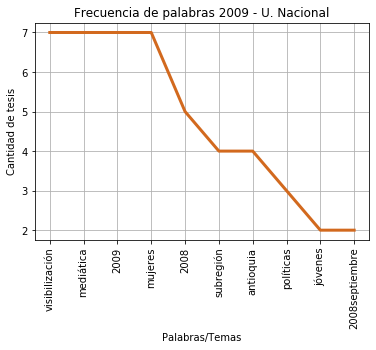

In [145]:
plt.plot(*zip(*freq_w_2009[:10]), color = 'chocolate', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2009 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2009.png')

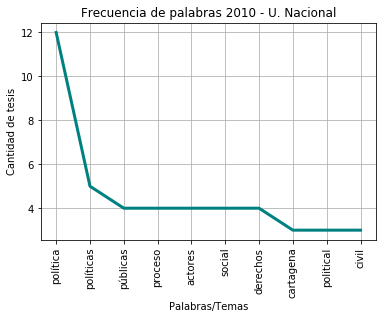

In [146]:
plt.plot(*zip(*freq_w_2010[:10]), color = 'teal', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2010 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2010.png')

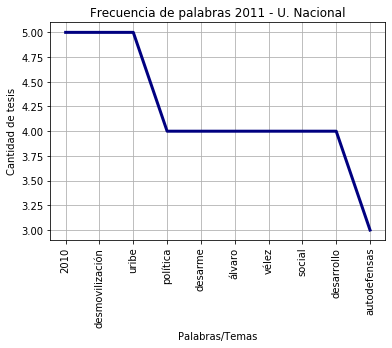

In [147]:
plt.plot(*zip(*freq_w_2011[:10]), color = 'navy', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2011 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2011.png')

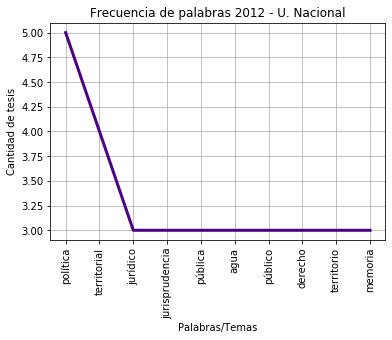

In [148]:
plt.plot(*zip(*freq_w_2012[:10]), color = 'indigo', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2012 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2012.png')

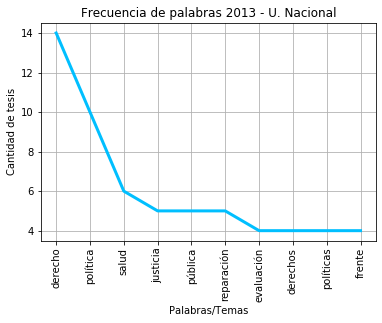

In [149]:
plt.plot(*zip(*freq_w_2013[:10]), color = 'deepskyblue', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2013 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2013.png')

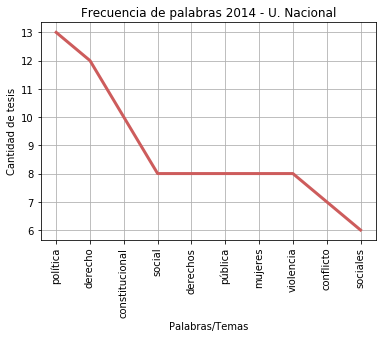

In [150]:
plt.plot(*zip(*freq_w_2014[:10]), color = 'indianred', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2014 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2014.png')

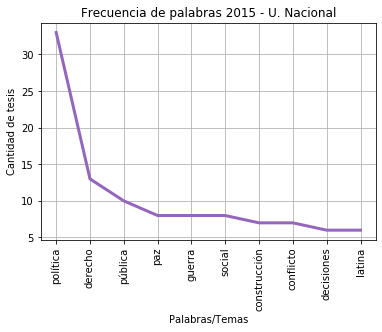

In [151]:
plt.plot(*zip(*freq_w_2015[:10]), color = 'tab:purple', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2015 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2015.png')

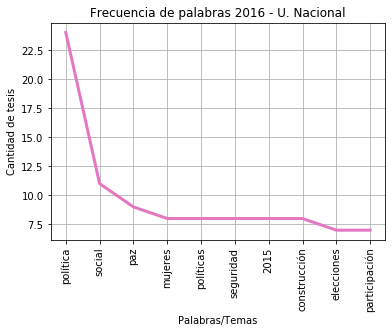

In [152]:
plt.plot(*zip(*freq_w_2016[:10]), color = 'tab:pink', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2016 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2016.png')

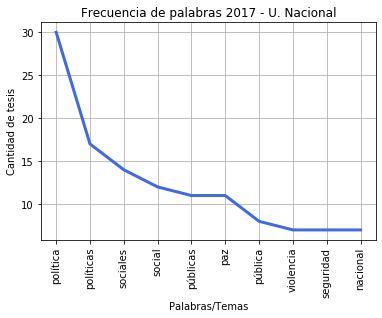

In [153]:
plt.plot(*zip(*freq_w_2017[:10]), color = 'royalblue', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2017 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2017.png')

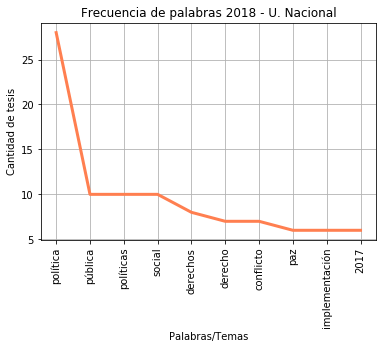

In [154]:
plt.plot(*zip(*freq_w_2018[:10]), color = 'coral', linewidth = 3)
plt.xlabel('Palabras/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Frecuencia de palabras 2018 - U. Nacional')
plt.grid()
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xticks(rotation=90)
plt.savefig('top10nacho_2018.png')

Hacemos conteo de bigramas y graficamos los años donde hubo más de 30 tesis

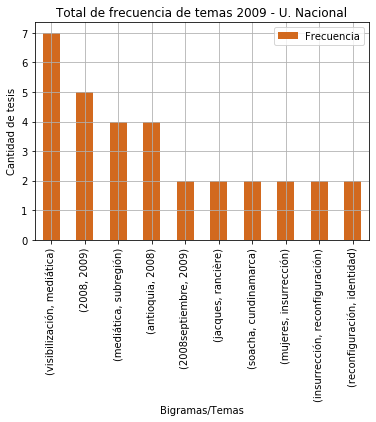

<Figure size 432x288 with 0 Axes>

In [155]:
bi_2009 = df_2009['bigrams'].tolist()
bi_2009 = list(chain(*bi_2009))
bi_2009 = [(x.lower(), y.lower()) for x,y in bi_2009]
bi_2009_count = list(Counter(bi_2009).most_common(10))
bi_2009_count = tuple(bi_2009_count)

df_bi_2009 = pd.DataFrame(bi_2009_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2009.plot(kind='bar', x = 'Bigrama', stacked=True, color='chocolate')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2009 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2009.png')

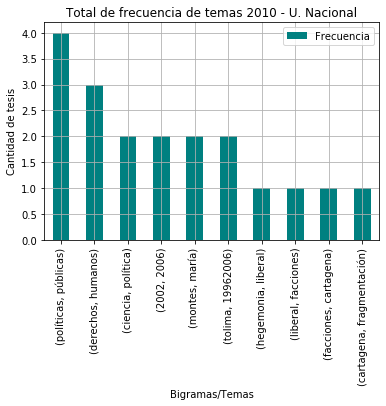

<Figure size 432x288 with 0 Axes>

In [156]:
bi_2010 = df_2010['bigrams'].tolist()
bi_2010 = list(chain(*bi_2010))
bi_2010 = [(x.lower(), y.lower()) for x,y in bi_2010]
bi_2010_count = list(Counter(bi_2010).most_common(10))
bi_2010_count = tuple(bi_2010_count)

df_bi_2010 = pd.DataFrame(bi_2010_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2010.plot(kind='bar', x = 'Bigrama', stacked=True, color='teal')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2010 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2010.png')

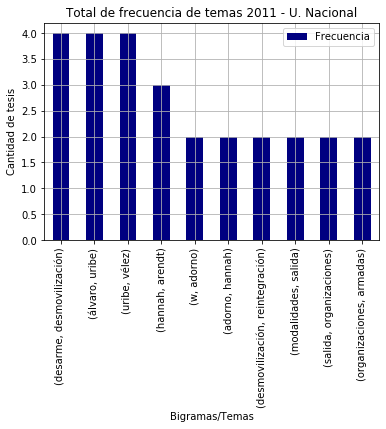

<Figure size 432x288 with 0 Axes>

In [157]:
bi_2011 = df_2011['bigrams'].tolist()
bi_2011 = list(chain(*bi_2011))
bi_2011 = [(x.lower(), y.lower()) for x,y in bi_2011]
bi_2011_count = list(Counter(bi_2011).most_common(10))
bi_2011_count = tuple(bi_2011_count)

df_bi_2011 = pd.DataFrame(bi_2011_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2011.plot(kind='bar', x = 'Bigrama', stacked=True, color='navy')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2011 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2011.png')

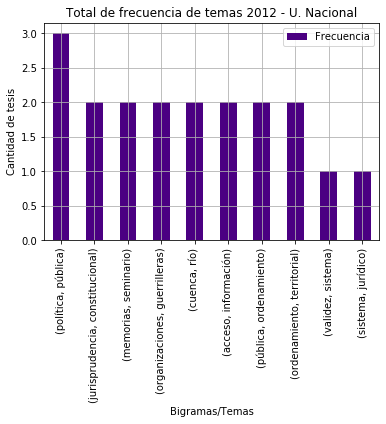

<Figure size 432x288 with 0 Axes>

In [158]:
bi_2012 = df_2012['bigrams'].tolist()
bi_2012 = list(chain(*bi_2012))
bi_2012 = [(x.lower(), y.lower()) for x,y in bi_2012]
bi_2012_count = list(Counter(bi_2012).most_common(10))
bi_2012_count = tuple(bi_2012_count)

df_bi_2012 = pd.DataFrame(bi_2012_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2012.plot(kind='bar', x = 'Bigrama', stacked=True, color='indigo')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2012 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2012.png')

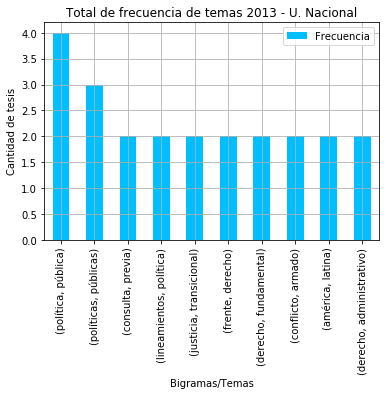

<Figure size 432x288 with 0 Axes>

In [159]:
bi_2013 = df_2013['bigrams'].tolist()
bi_2013 = list(chain(*bi_2013))
bi_2013 = [(x.lower(), y.lower()) for x,y in bi_2013]
bi_2013_count = list(Counter(bi_2013).most_common(10))
bi_2013_count = tuple(bi_2013_count)

df_bi_2013 = pd.DataFrame(bi_2013_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2013.plot(kind='bar', x = 'Bigrama', stacked=True, color='deepskyblue')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2013 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2013.png')

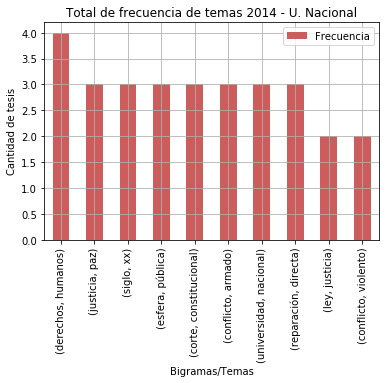

<Figure size 432x288 with 0 Axes>

In [160]:
bi_2014 = df_2014['bigrams'].tolist()
bi_2014 = list(chain(*bi_2014))
bi_2014 = [(x.lower(), y.lower()) for x,y in bi_2014]
bi_2014_count = list(Counter(bi_2014).most_common(10))
bi_2014_count = tuple(bi_2014_count)

df_bi_2014 = pd.DataFrame(bi_2014_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2014.plot(kind='bar', x = 'Bigrama', stacked=True, color='indianred')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2014 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2014.png')

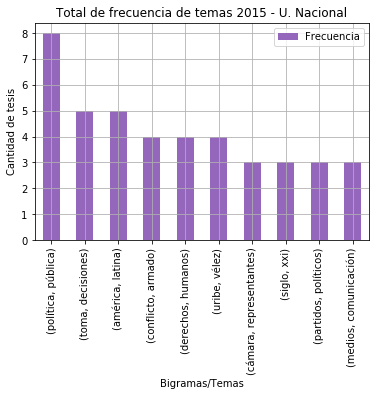

<Figure size 432x288 with 0 Axes>

In [161]:
bi_2015 = df_2015['bigrams'].tolist()
bi_2015 = list(chain(*bi_2015))
bi_2015 = [(x.lower(), y.lower()) for x,y in bi_2015]
bi_2015_count = list(Counter(bi_2015).most_common(10))
bi_2015_count = tuple(bi_2015_count)

df_bi_2015 = pd.DataFrame(bi_2015_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2015.plot(kind='bar', x = 'Bigrama', stacked=True, color='tab:purple')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2015 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2015.png')

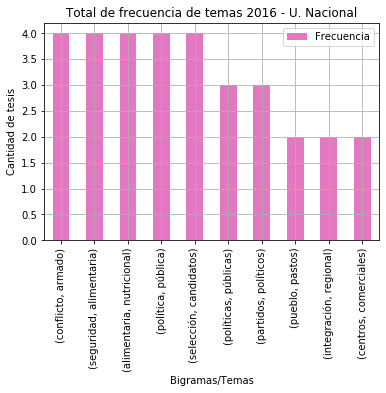

<Figure size 432x288 with 0 Axes>

In [162]:
bi_2016 = df_2016['bigrams'].tolist()
bi_2016 = list(chain(*bi_2016))
bi_2016 = [(x.lower(), y.lower()) for x,y in bi_2016]
bi_2016_count = list(Counter(bi_2016).most_common(10))
bi_2016_count = tuple(bi_2016_count)

df_bi_2016 = pd.DataFrame(bi_2016_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2016.plot(kind='bar', x = 'Bigrama', stacked=True, color='tab:pink')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2016 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2016.png')

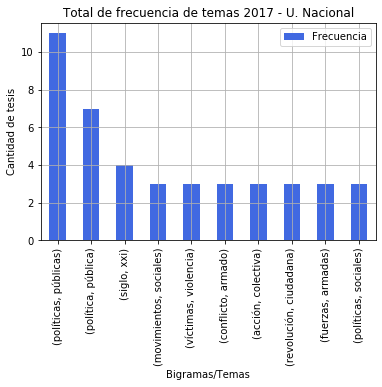

<Figure size 432x288 with 0 Axes>

In [163]:
bi_2017 = df_2017['bigrams'].tolist()
bi_2017 = list(chain(*bi_2017))
bi_2017 = [(x.lower(), y.lower()) for x,y in bi_2017]
bi_2017_count = list(Counter(bi_2017).most_common(10))
bi_2017_count = tuple(bi_2017_count)

df_bi_2017 = pd.DataFrame(bi_2017_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2017.plot(kind='bar', x = 'Bigrama', stacked=True, color='royalblue')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2017 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2017.png')

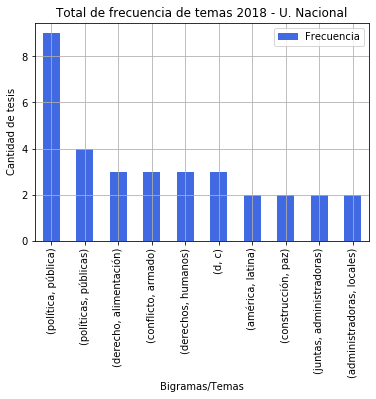

<Figure size 432x288 with 0 Axes>

In [164]:
bi_2018 = df_2018['bigrams'].tolist()
bi_2018 = list(chain(*bi_2018))
bi_2018 = [(x.lower(), y.lower()) for x,y in bi_2018]
bi_2018_count = list(Counter(bi_2018).most_common(10))
bi_2018_count = tuple(bi_2018_count)

df_bi_2018 = pd.DataFrame(bi_2018_count, columns=['Bigrama', 'Frecuencia'])
df_bi_2018.plot(kind='bar', x = 'Bigrama', stacked=True, color='royalblue')
plt.grid()
plt.xlabel('Bigramas/Temas')
plt.ylabel('Cantidad de tesis')
plt.title('Total de frecuencia de temas 2018 - U. Nacional')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.show()
plt.savefig('bigramnacho_2018.png')